# - 3차 시험(전처리 ~ 머신러닝) : 6/5(금) 17:00

# <font color = "skyblue"> Day 17 ~ Day 29

In [1]:
math_schedule = pd.read_csv('resources/Math_schedule.csv',index_col=0)
math_schedule[16:30]

,수학/통계/머신러닝 강의주제,강의명_온라인
Day,,
17,"다중공선성과변수선택_정규화선형회귀, NLTK 자연어 처리 패키지_KoNLPy 한국어...","다중공선성과변수선택_정규화선형회귀_20191126_01, NLTK 자연어 처리 패키..."
18,"Scikit-Learn 문서 전처리_gensim, 확률론적 언어 모형, Soynlp...","Scikit-Learn 문서 전처리_gensim_20191213_01, 확률론적 언..."
19,"이미지 필터링_컨투어_변환, 사운드 프로세싱 기초, 푸리에 변환과 스펙트럼, 지리 ...","이미지 필터링_컨투어_변환_20191219_03 ~ 04, 사운드 프로세싱 기초, ..."
20,"분류모형, 분류 성능평가","분류모형_20191227_01 ~ 02, 분류 성능평가_20191227_03 ~ 04"
21,로지스틱회귀,로지스틱회귀_20200102_01 ~ 04
22,선형판별분석법과 이차판별분석법_나이브베이즈 분류모형,선형판별분석법과 이차판별분석법_나이브베이즈 분류모형_20200103_01 ~ 04
23,"다항분포 나이브제이즈 모형, 감성 분석, 의사결정나무","다항분포 나이브제이즈 모형_20200109_01, 감성 분석_20200109_02,..."
24,"모형 결합, 배깅, 부스팅, 에이다부스트_그래디언트 부스트","모형 결합_20200110_01, 배깅_20200110_02, 부스팅_2020011..."
25,"퍼셉트론, 서포트벡터머신","퍼셉트론_20200116_01, 서포트벡터머신_20200116_02 ~ 04"


## 분류모형
- Classification 
    - 확률적 생성모형(Bayesian)
    - 확률적 판별모형
    - 판별함수 모형

### 확률론적 생성모형(Bayesian)


$$ 𝑃(𝑦=𝑘∣𝑥)=𝑃(𝑥∣𝑦=𝑘)𝑃(𝑦=𝑘) / 𝑃(𝑥) $$

#### - QDA (Quadratic Discriminant Analysis)

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.title("Train data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()
%matplotlib inline

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

In [4]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

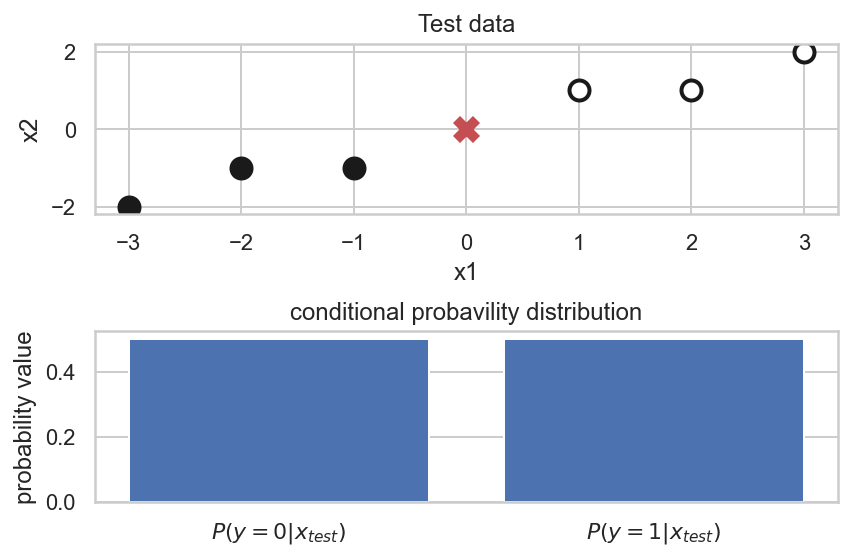

In [5]:
plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("Test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probavility distribution")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("probability value")
plt.tight_layout()
plt.show()


#### - LDA (Linear Discrimina Analysis)

#### - Naive Bayesian

### 확률론적 판별모형


$ p(y=k |x) = f(x) $ , f(x)는 0보다 같거나 크고 1보다 같거나 작다

#### - Logistic Regression

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1, random_state=1)

model = LogisticRegression().fit(X0, y)

### 판별함수 dicision function 모형 : 피쳐를 2가지만 넣을수있다. (예: 아이리스 꽃잎의 길이, 꽃잎의 폭 2가지)
- 부호만 본다 그래서 2종류이 클래스만 분류가능

- 경계면 정의(boundary plane)

#### - Perceptron

#### - Kernel SVM

### 다중 클래스 분류 / 판별함수에서 클래스 3개의 문제풀이


#### - OvO(One vs One) K의 제곱으로 실행해야한다 너무 많이 해야됨

#### - OvR(One vs the Rest) 


## 분류모형 성능평가
- confusion_matrix(y_true, y_pred)
- accuracy_score(y_true, y_pred)
- precision_score(y_true, y_pred)
- recall_score(y_true, y_pred)
- fbeta_score(y_true, y_pred, beta)
- f1_score(y_true, y_pred)
- classfication_report(y_true, y_pred)
- roc_curve
- auc

In [7]:
from sklearn.metrics import confusion_matrix

yt = [1, 1, 0, 0, 1]
yp = [1, 1, 1, 1, 1]

In [8]:
confusion_matrix(yt, yp)

array([[0, 2],
       [0, 3]])

## 1. Accuracy = TP + TN / TP + TN + FP + FN 
## 모두 분에 대각선

## 2. Precision = TP / TP + FP
## 왼쪽줄중에 위에

## 3. Recall rate = TP / TP + FN
## 윗줄 중에 왼쪽


## 4. Fallout = FP / FP + TN
## 아랫줄 중에 왼쪽


## # Logistic Regression

# logitstic(𝑧)=𝜎(𝑧)=1/1+exp(−𝑧)

# 연습 문제 1
붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 
독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 
예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?

위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.

이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 
위에서 StatsModels로 구한 모형을 사용한다.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
X = iris.data[:,:1]
y = iris.target
X = X[:100]
y = y[y < 2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

result = model.predict(X)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, result)

array([[45,  5],
       [ 6, 44]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y, result))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [14]:
from sklearn.metrics import roc_curve
# 
# plt.plot(fpr, tpr)
# plt.show()

# 연습 문제 2
붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=1, virginica=2) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 이 보고서에서 버지니카와 베르시칼라를 구분하는 경계면의 방정식을 찾아라.

위 결과를 분류결과표와 분류결과보고서로 나타내라.

이 모형에 대해 ROC커브를 그리고 AUC를 구하라. 
이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [15]:
idx = np.in1d(iris.target, [1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns = iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx] - 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=1)
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:                  0.9142
Time:                        09:25:05   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal l

In [17]:
y_pred = logit_res.predict(X) >= 0.5

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## 로지스틱 회귀를 사용한 회귀분석
- 비율이나 점수를 예측할때 선형회귀에서의 한도를 넘어선 점수나 마이너스 비율등이 나오는것보다 나은 예측성능을 보임.

In [19]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")

In [20]:
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


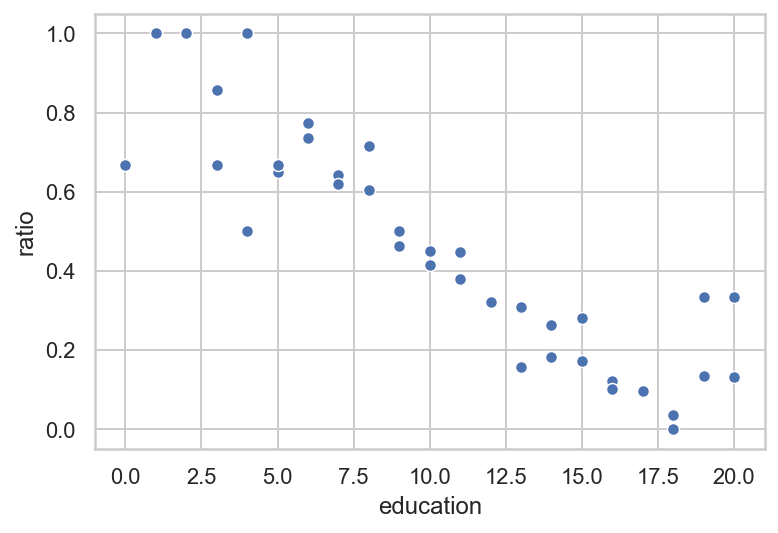

In [21]:
sns.scatterplot(df_wrole.education, df_wrole.ratio)

In [22]:
model = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:                  0.3435
Time:                        09:25:09   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [23]:
model = sm.Logit.from_formula("ratio ~ education", df_wrole)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:                  0.3422
Time:                        09:25:09   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

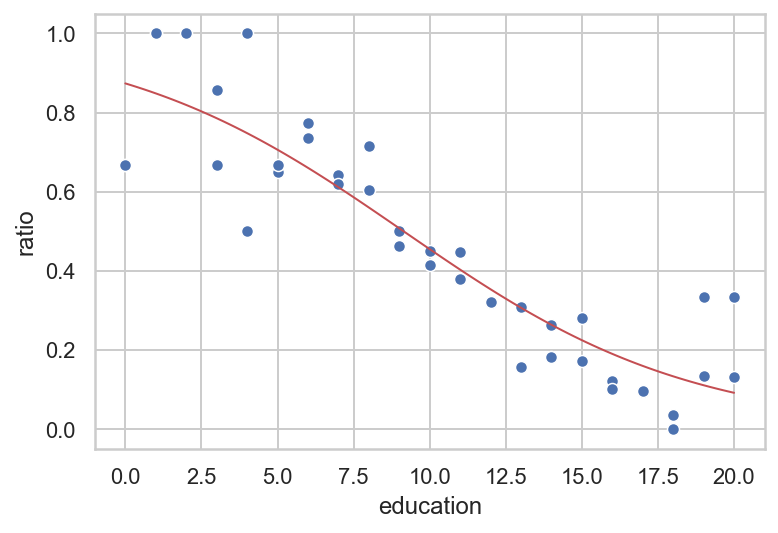

In [24]:
sns.scatterplot(df_wrole.education, df_wrole.ratio, data = df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result.predict(df_wrole_p.education), "r-", lw=1, label="예측")

## LDA, QDA


#### QDA 확률론적 생성모형의 조건부확률 가능도 계산은

$y$에 대한 $x$의 조건부확률인 가능도는 다음과 같이 계산한다.

1. $P(x \mid y = k)$ 가 특정한 확률분포 모형을 따른다고 가정한다. 즉, 확률밀도함수의 형태를 가정한다.
2. $k$번째 클래스에 속하는 학습 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수값을 구한다.
3. 모수값을 알고 있으므로 $P(x \mid y = k)$의 확률 밀도 함수를 구한 것이다. 즉, 새로운 독립변수 값 $x$이 어떤 값이 되더라도 $P(x \mid y = k)$의 값을 계산할 수 있다.

#### 사람의 체온을 예를 들면 아래의 과정과 같다

quiz : 체온이 µ=37.5, 𝞼^2 = 0.1 인 정규분포를 따른다고 할때, 체온이 38도 인사람의 확률일 확률밀도는?  p(x|y = 정상) > p(x|y = 38)?

In [25]:
rv_nomal = sp.stats.norm(loc=37.5, scale = 0.1)
rv_nomal.pdf(38.34)

1.9010815379074236e-15

In [26]:
rv_flu = sp.stats.norm(loc=40, scale = 0.2)
rv_flu.pdf(38.34)

2.1908197177549902e-15

#### QDA에서는 이것을 means_ , covariance_ 로 제공하고 여기에 사전확률 priors_ 를 더해서 데이터의 위치의 확률값으로 데이터를 판별/구분 한다.

# 연습 문제 1
#### 이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 
#### 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns = iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# label bineraize
from sklearn.preprocessing import label_binarize
label_binarize(y, [0, 1, 2])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X0, y)

In [30]:
y_pred = qda_model.predict(X0)

#### 분류결과표

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

#### 분류보고서

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



#### ROC Curve

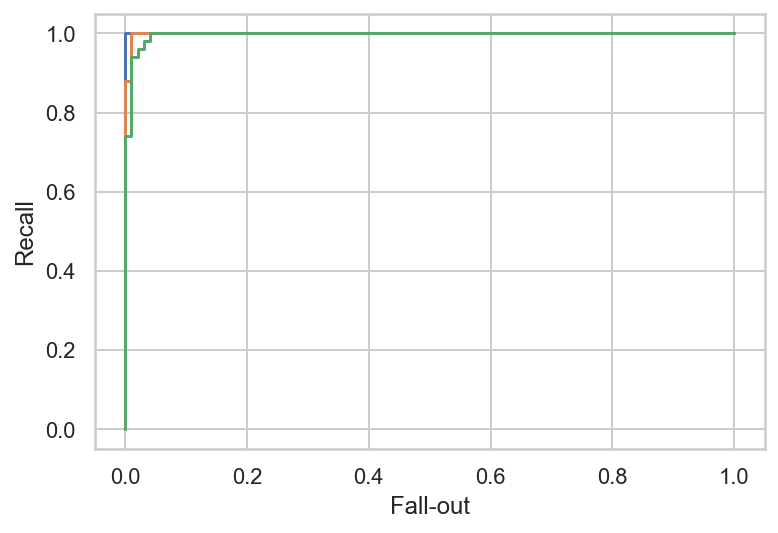

In [33]:
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
iris = load_iris()
X0 = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3



from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X0, y[:, i])
    fpr, tpr, thr = roc_curve(y[:, i], model.predict_proba(X0)[:, 1])
    plt.plot(fpr, tpr)
plt.xlabel('Fall-out')
plt.ylabel('Recall')
plt.show()

%matplotlib inline

#### LDA 확률론적 생성모형 클래스별 분산이 모두 같다고 가정하고 (계산량을 줄이기위해) 계산함

# QDA < LDA < NB (모델의 간편성)

## Naive Bayese : NLP를 하는데 많이 쓰게 됨(주어진 조건일때 조건부독립을 활용)
## 조건부 독립의 성질을 알아둬야함


확률변수 A, B가 독립이면 A, B의 결합확률은 주변확률의 곱과 같다.

$$ P(A, B) = P(A)P(B) $$

조건부독립(conditional independence)은 일반적인 독립과 달리 조건이 되는 별개의 확률변수 C가 존재해야 한다.
조건이 되는 확률변수 C에 대한 A, B의 결합조건부확률이 C에 대한 A, B의 조건부확률의 곱과 같으면 A와 B가 C에 대해 조건부독립이라고 한다.

$$ P(A, B|C) = P(A|C) P(B|C) $$

기호로는 다음과 같이 표기한다.

$$ A \text{⫫} B \;\vert\; C $$

조건부독립과 비교하여 일반적인 독립은 무조건부독립이라고 한다. 무조건부독립은 다음과 같이 표기하도 한다.

$$ A \text{⫫} B \;\vert\; \emptyset $$

A, B가 C에 대해 조건부독립이면 다음도 만족한다.

$$ P(A|B,C) = P(A|C) $$

$$ P(B|A,C) = P(B|C) $$

주의할 점은 조건부독립과 무조건부독립은 관계가 없다는 점이다. 즉, 두 확률변수가 독립이라고 항상 조건부독립이 되는 것도 아니고 조건부독립이라고 꼭 독립이 되는 것도 아니다.

$$ P(A,B) = P(A)P(B) \;\; \bcancel{\implies} \;\; P(A,B|C) = P(A|C)P(B|C) $$

$$  P(A,B|C) = P(A|C)P(B|C) \;\; \bcancel{\implies} \;\; P(A,B) = P(A)P(B) $$

독립변수 $x$가 $D$차원이라고 가정하자. 

$$ x = (x_1, \ldots, x_D) $$

가능도함수는 $x_1, \ldots, x_D$의 결합확률이 된다.

$$ P(x \mid y = k) = P(x_1, \ldots, x_D \mid y = k) $$ 

원리상으로는 $y=k$인 데이터만 모아서 이 가능도함수의 모양을 추정할 수 있다. 하지만 차원 $D$가 커지면 가능도함수의 추정이 현실적으로 어려워진다. 

따라서 나이즈베이즈 분류모형(Naive Bayes classification model)에서는 모든 차원의 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정을 사용한다. 이러한 가정을 나이브 가정(naive assumption)이라고 한다.



나이브 가정으로 사용하면 벡터 $x$의 결합확률분포함수는 개별 스칼라 원소 $x_d$의 확률분포함수의 곱이 된다.

$$
P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k) "같은 클래스 내에서 조건부 독립이라고 가정한다" 
$$

스칼라 원소 $x_d$의 확률분포함수는 결합확률분포함수보다 추정하기 훨씬 쉽다.

가능도함수를 추정한 후에는 베이즈정리를 사용하여 조건부확률을 계산할 수 있다.

$$
\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}
$$


## NB의 가능도모형 확률분포는 아래의 3가지를 주로 따른다
- Gausian Nomal : x 값이 실수일때 
- Bernoulli : x값이 0, 1일때
- Multinomial : x값이 정수 일때


# 1. sklearn.naive_bayes.GaussianNB

In [34]:
# sample
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X,Y)
print(clf.predict([[-0.8, -1]]))

[1]


### theta_: 정규분포의 기댓값  𝜇 
### sigma_: 정규분포의 분산  𝜎2

In [35]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])


In [36]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB().fit(X, y)

In [37]:
model_GNB.classes_

array([0., 1.])

In [38]:
model_GNB.class_count_

array([40., 60.])

In [39]:
model_GNB.class_prior_

array([0.4, 0.6])

In [40]:
model_GNB.theta_

array([[-1.96197643, -2.00597903],
       [ 2.19130701,  2.12626716]])

In [41]:
model_GNB.sigma_

array([[1.02398854, 2.31390497],
       [1.25429371, 1.93742544]])

In [42]:
# pridict
x_new = [0, 0]

In [43]:
model_GNB.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

# 연습문제 
붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어보자.

(1) 각각의 종이 선택될 사전확률을 구하라.

(2) 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하라.

(3) 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라.

분류결과표
분류보고서

In [44]:
iris = load_iris()
X0 = iris.data
y = iris.target

In [45]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X0, y)

In [46]:
# 1) 
model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [47]:
model.theta_[0], model.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [48]:
model.theta_[1], model.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [49]:
model.theta_[2], model.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [50]:
y_pred = model.predict(X0)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



# 베르누이 확률분포 나이브베이즈

In [53]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [54]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

# Model ensemble

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

model1 = GaussianNB()
model2 = SVC()
model3 = LogisticRegression(random_state=1)
ensemble = VotingClassifier(estimators=[('gn', model1), ('svc', model2), ('lr', model3)])

from sklearn.model_selection import cross_val_score, KFold
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(ensemble, X0, y, scoring="accuracy", cv=cv).mean()

ValueError: Found input variables with inconsistent numbers of samples: [150, 10]

In [ ]:
bc.data, bc.target

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

bc = load_breast_cancer()
X = bc.data
y = bc.target
model = DecisionTreeClassifier(max_depth=10)

cv = KFold(5, shuffle = True, random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

In [ ]:
model.get_depth

In [ ]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=10)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100)

accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

In [ ]:
idx = np.argsort(forest.feature_importances_)
names = bc.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.show()

In [ ]:
# aggregation method : 사용모델 미리배치, 모델이 같은 작업을 한다.
# boosting method : 모델이 하나씩 투입, 모델이 다른 작업을 한다. 

In [ ]:
### 약분류기를 전단계의 못하는 부분을 보완해줄 모델을 소프트보팅같은 방법으로 가중선형으로 
### 다음 모델을 추가해가며 커미티를 만들어서 작업

# ada boost

$$
𝐿𝑚=∑𝑖=1𝑁𝑤𝑚,𝑖𝐼(𝑘𝑚(𝑥𝑖)≠𝑦𝑖)
$$

# Perceptron
- L = ∑max(0, -y^y) = -∑ yiy^i

# Surport Vector Machine
- SVC 

#### 연습 문제 1

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 
위의 예제와 마찬가지로 커널 인수 `kernel`과 슬랙변수 가중치 인수 `C`는 각각 `linear`, `1e10`으로 한다.

* 특징 변수를 꽃받침의 길이와 폭만 사용한다.
* 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.


In [9]:
from sklearn.svm import SVC
iris = load_iris()
X0 = pd.DataFrame(iris.data[idx, :], columns = iris.feature_names[:])
X = sm.add_constant(X0)[:1]
y = iris.target
idx = np.in1d(iris.target, [0, 1])

NameError: name 'load_iris' is not defined

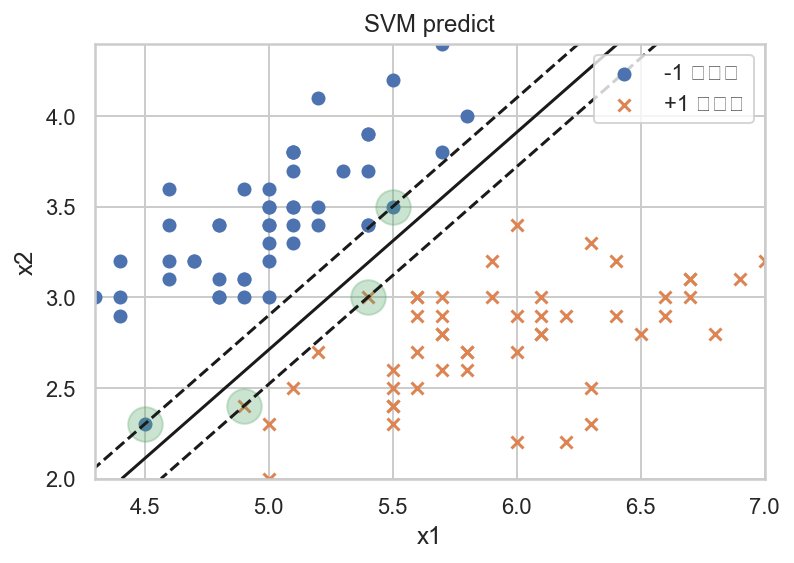

In [94]:
from sklearn.svm import SVC
iris = load_iris()
X = iris.data
idx = np.in1d(iris.target, [0, 1])
X = X[:100, :2]
# X = sm.add_constant(X0)
y = iris.target[idx]


model = SVC(kernel='linear', C=1e10).fit(X, y)


xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM predict")

plt.show()

In [95]:
### svc는 image 분류에 탁월하다

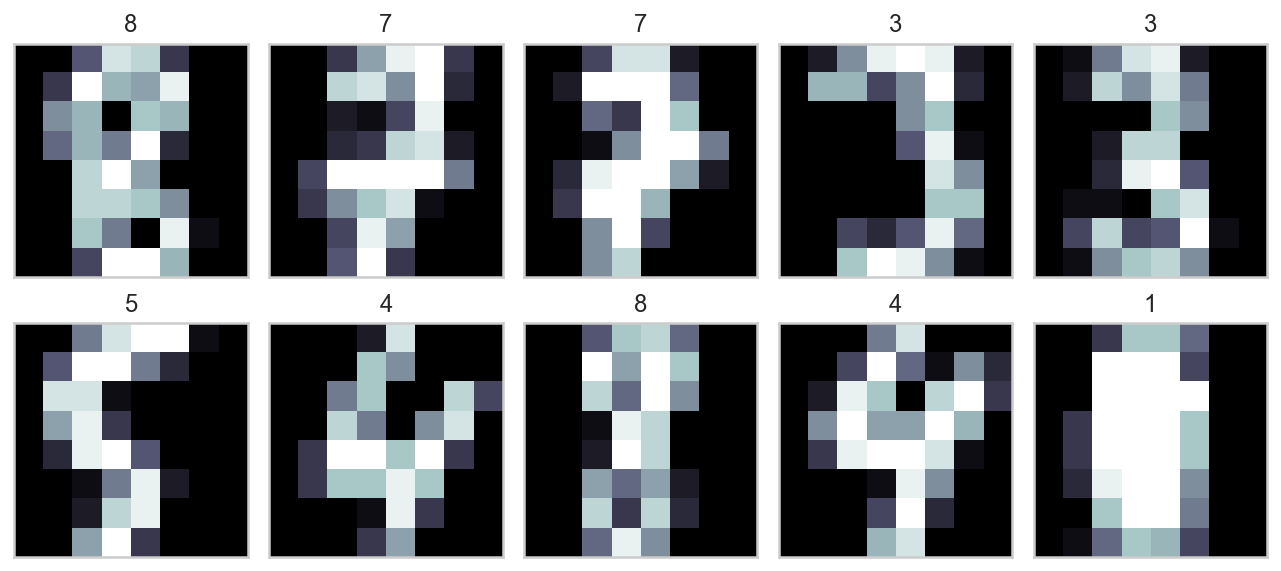

In [104]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(digits.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target[k])
plt.tight_layout()
plt.show()

In [106]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       106

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



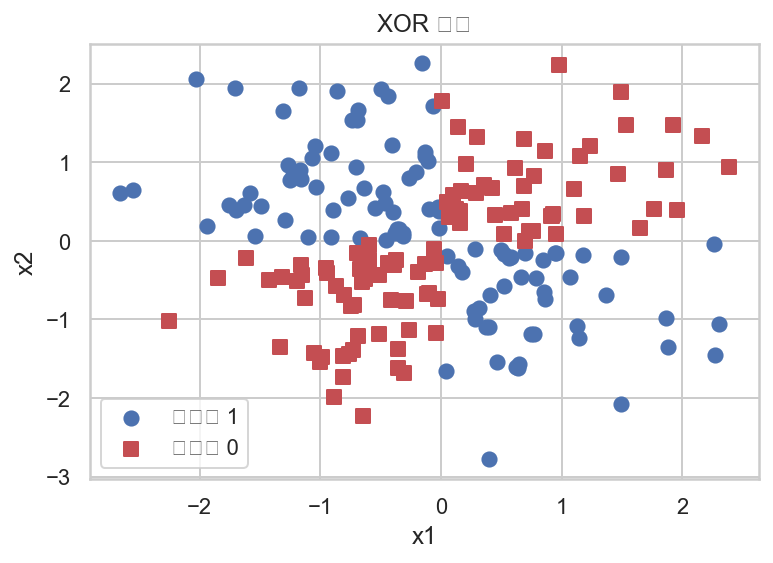

In [12]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='클래스 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='클래스 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR 문제")
plt.show()
%matplotlib inline

In [23]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

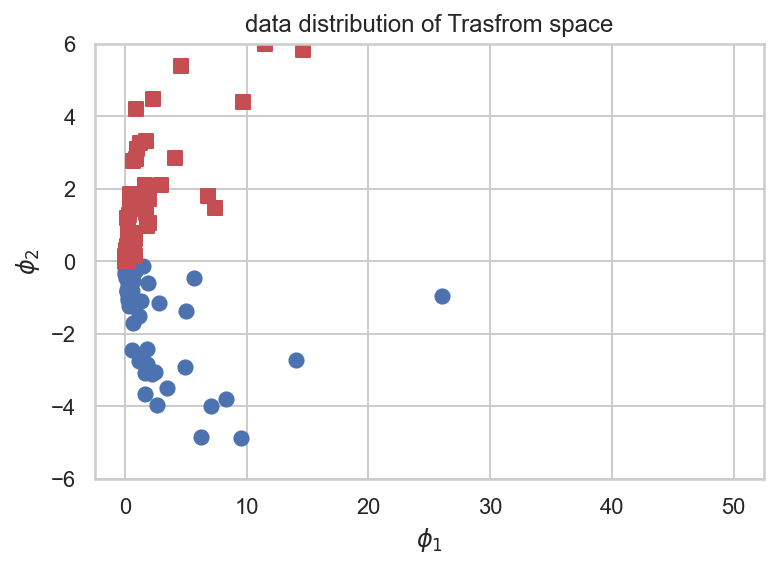

In [24]:
X_xor = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("data distribution of Trasfrom space")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
basismdl = Pipeline([("basis", FunctionTransformer(basis)),("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "변환함수 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

NameError: name 'basismodel' is not defined

# kernel SVM's default  = RBF

In [ ]:
# 1) 실무에서 하이퍼파라미터 튜닝
# 2) 데이터의 비대칭문제 솔루션
# 3) 데이터의 크기 : 종류가 많을때 피쳐셀렉션 순서
#    - 특성중요도를 익스트림 렌덤포레스트로 피쳐임포턴스 선택 > 베르누이 NB
#               : 특징의 갯수가 많을때 
#    - 대용량 분류가능 모델만 사용 SGD(스토케스틱 그래디언트 디센트 퍼셉트론), 나이브베이즈는 가능, SVM은 불가능